In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
import os
import numpy as np
import torch
from torch import nn, optim
from torch.functional import F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.decomposition import PCA

In [49]:
# Load and preprocss dataset
# Reading the CSV file
df = pd.read_csv("GTZAN/features_3_sec.csv")

# Drop the 'filename' column as it is no longer required for training
df = df.drop(labels="filename", axis=1)

# # Remove brackets and convert to numeric (applies to all columns except 'filename' and 'label')
# for col in df.columns[:-1]:  # Assuming 'label' is the last column
#     df[col] = df[col].apply(lambda x: str(x).strip('[]')).astype(float)

# Split data and labels
X, y = df.iloc[:, :-1], df.iloc[:, -1]

# Label Encoding
# Genre Encoding: 
# Blues - 0, Classical - 1, Country - 2, Disco - 3, Hip-hop - 4,
# Jazz - 5, Metal - 6, Pop - 7, Reggae - 8, Rock - 9
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Data Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# # pca
# pca = PCA(n_components=10)
# X = pca.fit_transform(X)

In [50]:
# split data for train, validation and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [51]:
# # Label Encoding
# # Genre Encoding: 
# # Blues - 0, Classical - 1, Country - 2, Disco - 3, Hip-hop - 4,
# # Jazz - 5, Metal - 6, Pop - 7, Reggae - 8, Rock - 9
# encoder = LabelEncoder()
# y_train_encoded = encoder.fit_transform(y_train)
# y_test_encoded = encoder.transform(y_test)

# # Data Scaling
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# # Apply PCA
# pca = PCA(n_components=10)  # Keep 10 principal components
# X_train = pca.fit_transform(X_train)
# X_test = pca.transform(X_test)

Training set score: 0.951
Test set score: 0.895
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       312
           1       0.91      0.96      0.94       314
           2       0.82      0.84      0.83       288
           3       0.81      0.91      0.86       300
           4       0.93      0.88      0.91       295
           5       0.92      0.87      0.89       322
           6       0.99      0.96      0.97       295
           7       0.91      0.84      0.87       302
           8       0.86      0.92      0.89       277
           9       0.90      0.81      0.86       292

    accuracy                           0.90      2997
   macro avg       0.90      0.89      0.89      2997
weighted avg       0.90      0.90      0.90      2997



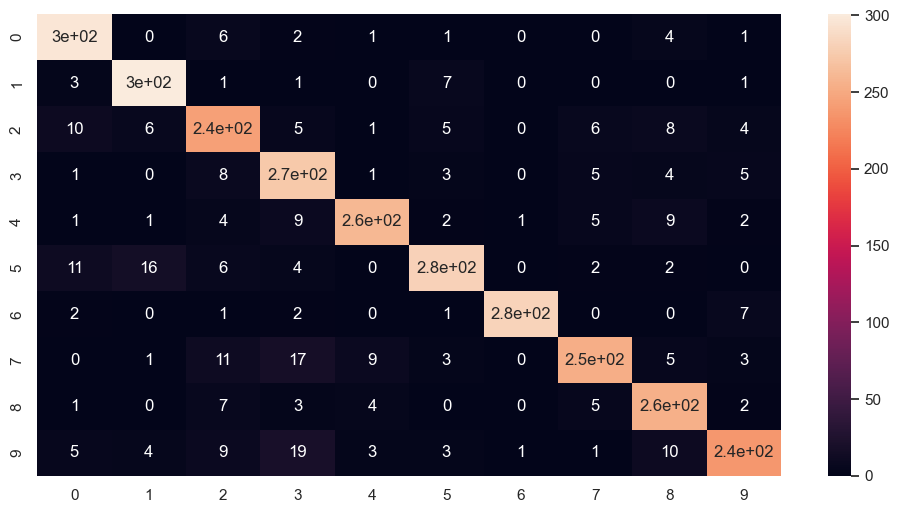

In [52]:
# KNN Classifier

# Train a KNN classifier
knn_cls = KNeighborsClassifier(n_neighbors=3)
knn_cls.fit(X_train, y_train)

# Predict on the test set
y_pred = knn_cls.predict(X_test)

# Print training and test accuracy
print("Training set score: {:.3f}".format(knn_cls.score(X_train, y_train)))
print("Test set score: {:.3f}".format(knn_cls.score(X_test, y_test)))

# Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.set(rc={'figure.figsize': (12, 6)})
sns.heatmap(cf_matrix, annot=True)

# Classification report
print(classification_report(y_test, y_pred))

Training set score: 0.920
Test set score: 0.843
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       312
           1       0.90      0.96      0.93       314
           2       0.77      0.77      0.77       288
           3       0.79      0.82      0.81       300
           4       0.93      0.82      0.87       295
           5       0.86      0.88      0.87       322
           6       0.89      0.92      0.91       295
           7       0.87      0.87      0.87       302
           8       0.83      0.83      0.83       277
           9       0.72      0.68      0.70       292

    accuracy                           0.84      2997
   macro avg       0.84      0.84      0.84      2997
weighted avg       0.84      0.84      0.84      2997



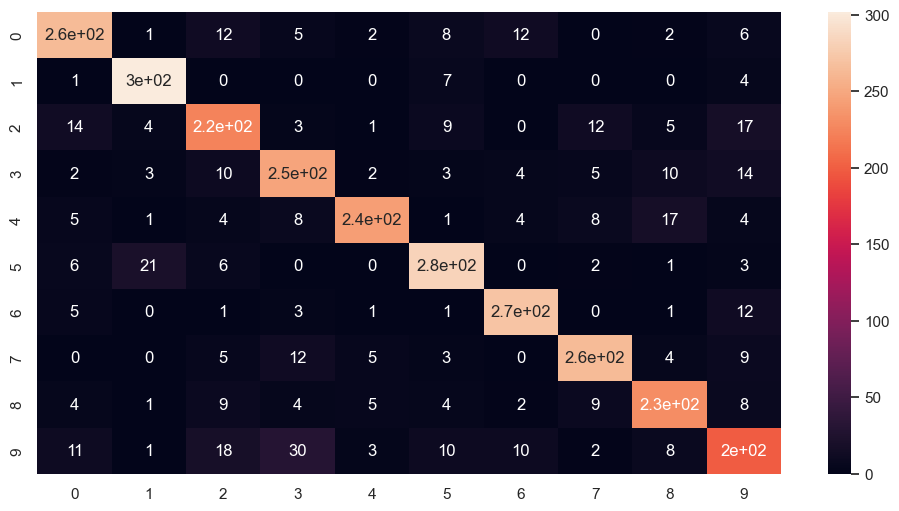

In [53]:
# SVM Classifier

# Train an SVM classifier
svm_cls = SVC(kernel='rbf', degree=8)
svm_cls.fit(X_train, y_train)

# Print training and test accuracy
print("Training set score: {:.3f}".format(svm_cls.score(X_train, y_train)))
print("Test set score: {:.3f}".format(svm_cls.score(X_test, y_test)))

# Predict on the test set
y_pred = svm_cls.predict(X_test)

# Confusion matrix and classification report
cf_matrix3 = confusion_matrix(y_test, y_pred)
sns.set(rc={'figure.figsize': (12, 6)})
sns.heatmap(cf_matrix3, annot=True)

print(classification_report(y_test, y_pred))

In [56]:
# MLP with PyTorch

# Define an updated MLP model with Batch Normalization
class MLP(nn.Module):
    def __init__(self, input_size):
        super(MLP, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(input_size, 512)
        self.bn1 = nn.BatchNorm1d(512)  # BatchNorm after first Linear layer
        self.fc2 = nn.Linear(512, 256)
        self.bn2 = nn.BatchNorm1d(256)  # BatchNorm after second Linear layer
        self.fc3 = nn.Linear(256, 128)
        self.bn3 = nn.BatchNorm1d(128)  # BatchNorm after third Linear layer
        self.fc4 = nn.Linear(128, 64)
        self.bn4 = nn.BatchNorm1d(64)   # BatchNorm after fourth Linear layer
        self.fc5 = nn.Linear(64, 32)
        self.bn5 = nn.BatchNorm1d(32)   # BatchNorm after fifth Linear layer
        self.fc6 = nn.Linear(32, 10)
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = self.flatten(x)
        
        # First layer
        x = F.relu(self.bn1(self.fc1(x)))  # Apply BatchNorm after Linear, then ReLU
        x = self.dropout(x)
        
        # Second layer
        x = F.relu(self.bn2(self.fc2(x)))  # Apply BatchNorm
        x = self.dropout(x)
        
        # Third layer
        x = F.relu(self.bn3(self.fc3(x)))  # Apply BatchNorm
        x = self.dropout(x)
        
        # Fourth layer
        x = F.relu(self.bn4(self.fc4(x)))  # Apply BatchNorm
        x = self.dropout(x)
        
        # Fifth layer
        x = F.relu(self.bn5(self.fc5(x)))  # Apply BatchNorm
        x = self.dropout(x)
        
        # Final layer with softmax
        x = F.softmax(self.fc6(x), dim=1)
        return x


# Define model, loss function, and optimizer
input_size = X_train.shape[1]
model = MLP(input_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.000146)


# Training loop
num_epochs = 700
batch_size = 256

train_dataset = TensorDataset(torch.tensor(X_train), torch.tensor(y_train))
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

val_dataset = TensorDataset(torch.tensor(X_test), torch.tensor(y_test))
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Initialize variables to store best metrics
best_train_loss = float('inf')
best_train_accuracy = 0.0
best_val_loss = float('inf')
best_val_accuracy = 0.0

# Training loop with implicit accuracy calculation
step = 0
for epoch in range(num_epochs):
    model.train()
    
    # Initialize counters for training accuracy
    correct_train = 0
    total_train = 0
    train_loss = 0.0

    for inputs, labels in train_loader:
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs.float())

        # Loss calculation
        loss = criterion(outputs, labels)
        train_loss += loss.item()
        loss.backward()
        optimizer.step()

        # Training accuracy calculation
        _, predicted_train = outputs.max(1)
        total_train += labels.size(0)
        correct_train += predicted_train.eq(labels).sum().item()

        if step % 100 == 0:
            print(f"Step {step}, Train Loss: {loss.item():.4f}")
        step += 1

    # Compute average training loss & accuracy after each epoch
    train_loss /= len(train_loader)
    train_accuracy = 100 * correct_train / total_train

    # Validation phase
    model.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs.float())
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            # Validation accuracy calculation
            _, predicted_val = outputs.max(1)
            total_val += labels.size(0)
            correct_val += predicted_val.eq(labels).sum().item()

    val_loss /= len(val_loader)
    val_accuracy = 100 * correct_val / total_val

    # Update the best metrics if current epoch is better
    if train_loss < best_train_loss:
        best_train_loss = train_loss
    if train_accuracy > best_train_accuracy:
        best_train_accuracy = train_accuracy
    if val_loss < best_val_loss:
        best_val_loss = val_loss
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy

    # Print training and validation accuracy
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Training Accuracy: {train_accuracy:.2f}%, "
          f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%")

# Optionally print the best metrics
print(f"Best Train Loss: {best_train_loss:.4f}, Best Train Accuracy: {best_train_accuracy:.2f}%, "
          f"Best Validation Loss: {best_val_loss:.4f}, Best Validation Accuracy: {best_val_accuracy:.2f}%")

Step 0, Train Loss: 2.3107
Epoch 1/700, Train Loss: 2.2886, Training Accuracy: 16.89%, Validation Loss: 2.2780, Validation Accuracy: 29.63%
Epoch 2/700, Train Loss: 2.2501, Training Accuracy: 30.14%, Validation Loss: 2.2135, Validation Accuracy: 40.14%
Epoch 3/700, Train Loss: 2.2153, Training Accuracy: 36.59%, Validation Loss: 2.1767, Validation Accuracy: 43.18%
Step 100, Train Loss: 2.1600
Epoch 4/700, Train Loss: 2.1871, Training Accuracy: 40.31%, Validation Loss: 2.1489, Validation Accuracy: 45.95%
Epoch 5/700, Train Loss: 2.1609, Training Accuracy: 42.49%, Validation Loss: 2.1267, Validation Accuracy: 48.18%
Epoch 6/700, Train Loss: 2.1398, Training Accuracy: 44.12%, Validation Loss: 2.1071, Validation Accuracy: 49.65%
Epoch 7/700, Train Loss: 2.1213, Training Accuracy: 46.06%, Validation Loss: 2.0877, Validation Accuracy: 51.12%
Step 200, Train Loss: 2.1004
Epoch 8/700, Train Loss: 2.1086, Training Accuracy: 47.36%, Validation Loss: 2.0695, Validation Accuracy: 52.22%
Epoch 9/700

In [58]:
current_lr = optimizer.param_groups[0]['lr']
print(f"Current Learning Rate: {current_lr}")

Current Learning Rate: 1.4600000000000005e-09


- Version 1:
Best Train Loss: 1.4921, Best Train Accuracy: 96.97%, Best Validation Loss: 1.5723, Best Validation Accuracy: 88.82%
- Version 2: MinMaxScaler()
Best Train Loss: 1.6654, Best Train Accuracy: 79.92%, Best Validation Loss: 1.7073, Best Validation Accuracy: 75.41%
- Version 3: batch normalization btw linear & ReLU helps faster convergence
Best Train Loss: 1.4706, Best Train Accuracy: 99.21%, Best Validation Loss: 1.5320, Best Validation Accuracy: 92.93%
- Version 4: lr scheduler
Best Train Loss: 1.4956, Best Train Accuracy: 97.45%, Best Validation Loss: 1.5448, Best Validation Accuracy: 91.89%

-> Version 3 is best

Expected Index: [8 7 7 ... 7 0 9], Predicted Index: [8 7 7 ... 7 0 9]
Test Accuracy: 91.39%
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       312
           1       0.93      0.96      0.95       314
           2       0.86      0.90      0.88       288
           3       0.87      0.91      0.89       300
           4       0.94      0.91      0.93       295
           5       0.93      0.92      0.93       322
           6       0.97      0.95      0.96       295
           7       0.89      0.90      0.90       302
           8       0.91      0.93      0.92       277
           9       0.89      0.82      0.85       292

    accuracy                           0.91      2997
   macro avg       0.91      0.91      0.91      2997
weighted avg       0.91      0.91      0.91      2997



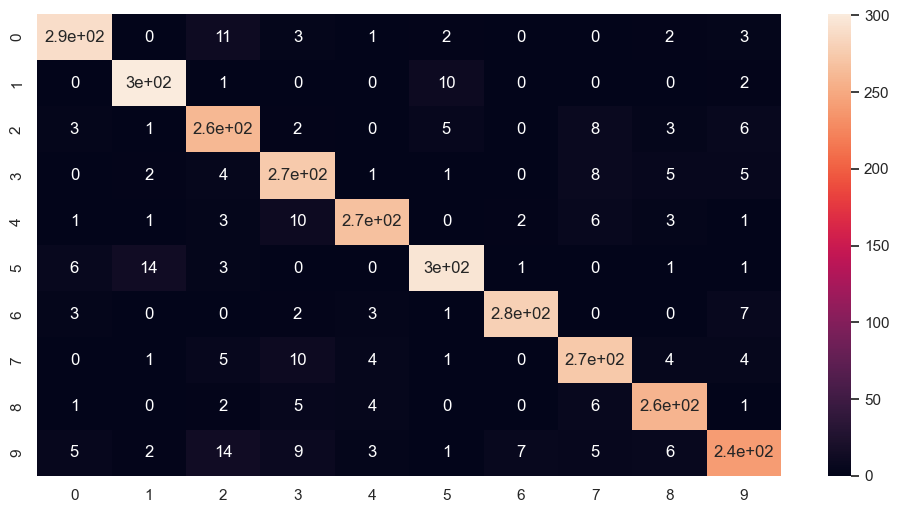

In [60]:
# Model Evaluation for MLP
# Sample testing
model.eval()
with torch.no_grad():
    predictions = model(torch.tensor(X_test).float())
    _, predicted_indices = predictions.max(1)
    y_pred = predicted_indices.numpy()
    print("Expected Index: {}, Predicted Index: {}".format(y_test, y_pred))

# Calculate test accuracy
test_accuracy = np.mean(y_pred == y_test) * 100
print(f"Test Accuracy: {test_accuracy:.2f}%")

# Confusion Matrix and Classification Report
cf_matrix = confusion_matrix(y_test, y_pred)
sns.set_theme(rc={'figure.figsize': (12, 6)})
sns.heatmap(cf_matrix, annot=True)

print(classification_report(y_test, y_pred))

/var/folders/pf/4hxrldrx2g7g5x19dwlvk36w0000gn/T/ipykernel_50679/773956228.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', num_classes)


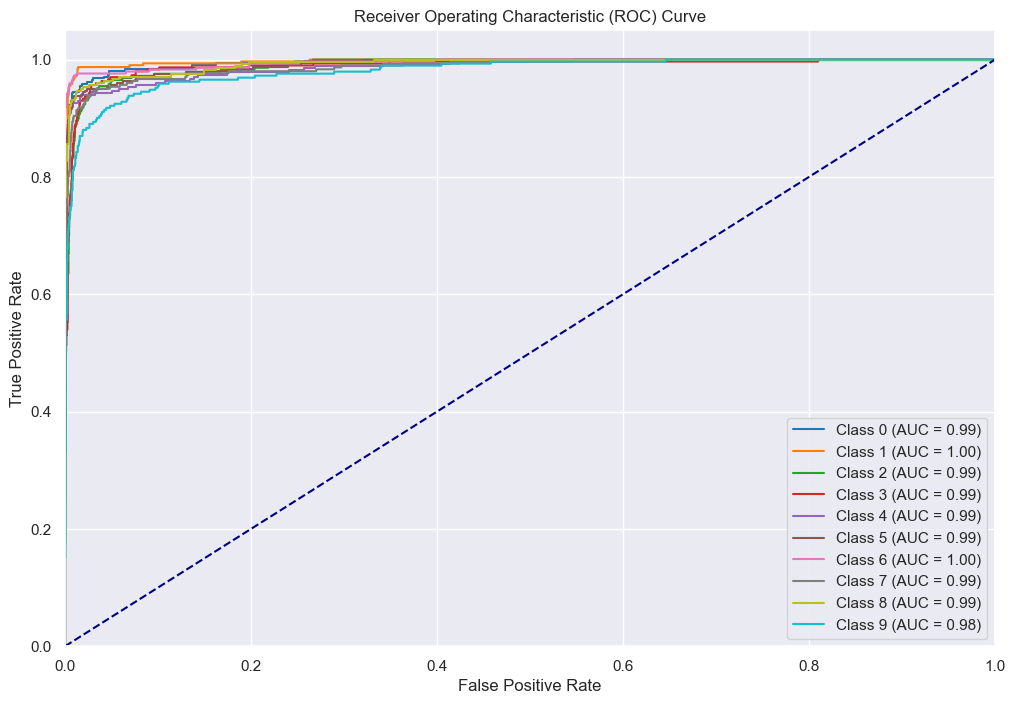

In [59]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Assuming you have 10 genres, you'll need a one-hot encoding for multi-class ROC
num_classes = 10

# Binarize the labels for multi-class ROC
y_test_binarized = label_binarize(y_test, classes=np.arange(num_classes))

# Get model predictions (probabilities) for the test set
model.eval()
with torch.no_grad():
    y_pred_proba = model(torch.tensor(X_test).float()).numpy()

# Compute ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(12, 8))
colors = plt.cm.get_cmap('tab10', num_classes)

for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], color=colors(i),
             label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
